<a href="https://colab.research.google.com/github/ykkimhgu/DLIP-src/blob/main/Tutorial_Pytorch/Tutorial_PyTorch_T4_1_Inference_using_Pretrained_YOLOv5_with_COCO_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DLIP Tutorial - PyTorch**
# Inference using Pretrained YOLOv5 with COCO dataset
Y.-K. Kim (updated 2022. 5. 17)

===================

Reference: https://colab.research.google.com/github/ultralytics/yolov5/blob/master/tutorial.ipynb#scrollTo=X58w8JLpMnjH


The purpose of this tutorial is to learn **how to infer object detection** using a pre-trained **YOLO v5** model.

<a align="left" href="https://ultralytics.com/yolov5" target="_blank">
<img width="1024", src="https://user-images.githubusercontent.com/26833433/125273437-35b3fc00-e30d-11eb-9079-46f313325424.png"></a>

This is the **official YOLOv5 🚀 notebook** by **Ultralytics**, and is freely available for redistribution under the [GPL-3.0 license](https://choosealicense.com/licenses/gpl-3.0/). 
For more information please visit https://github.com/ultralytics/yolov5 and https://ultralytics.com. Thank you!

# Case 1:  Run YOLOv5  with Pytorch Hub 

## Inference
#### Load YOLOv5 with PyTorch Hub

This example loads a pretrained YOLOv5s model from PyTorch Hub as model and passes an image for inference. It shows batched inference with PIL and OpenCV image sources. results can be printed to console, saved to runs/hub, showed to screen on supported environments, and returned as tensors or pandas data frames. For details on all available models please see the [README](https://github.com/ultralytics/yolov5#pretrained-checkpoints).

For this example, it needs a Python>=3.8 environment with PyTorch>=1.7 installed. 


Visit PyTorch HUB for more detail.  https://pytorch.org/hub/

In [ ]:
%cd ~/../content
%mkdir yolov5-1

/content


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
requirements: PyYAML>=5.3.1 not found and is required by YOLOv5, attempting auto-update...


/content/yolov5-1



requirements: 1 package updated per /root/.cache/torch/hub/ultralytics_yolov5_master/requirements.txt
requirements: ⚠️ Restart runtime or rerun command for updates to take effect

YOLOv5 🚀 2022-5-17 Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


  0%|          | 0.00/1.21M [00:00<?, ?B/s]

Saved 1 image to runs/detect/exp4


image 1/1: 712x1401 2 persons, 10 cars, 4 buss, 3 trucks
Speed: 14.3ms pre-process, 14.1ms inference, 1.5ms NMS per image at shape (1, 3, 352, 640)
Selected Image No = 0


tensor([[5.97665e+02, 3.25657e+02, 6.78885e+02, 4.18555e+02, 8.54179e-01, 2.00000e+00],
        [1.21339e+03, 2.97534e+02, 1.36189e+03, 4.22776e+02, 7.94355e-01, 2.00000e+00],
        [1.09718e+03, 3.00128e+02, 1.22421e+03, 4.01966e+02, 7.38492e-01, 2.00000e+00],
        [4.84952e+02, 3.09787e+02, 5.87113e+02, 4.26589e+02, 7.26835e-01, 2.00000e+00],
        [8.09630e+02, 2.94635e+02, 9.18545e+02, 4.16367e+02, 6.78364e-01, 5.00000e+00],
        [1.00851e+03, 2.95008e+02, 1.13090e+03, 4.09034e+02, 6.48540e-01, 2.00000e+00],
        [2.48774e+01, 3.16580e+02, 1.57442e+02, 4.10701e+02, 6.22339e-01, 2.00000e+00],
        [1.30419e+03, 2.83980e+02, 1.40100e+03, 4.00976e+02, 5.95513e-01, 2.00000e+00],
        [1.00735e+03, 3.85844e+02, 1.05263e+03, 4.54076e+02, 5.83598e-01, 0.00000e+00],
        [2.68775e+02, 2.75611e+02, 3

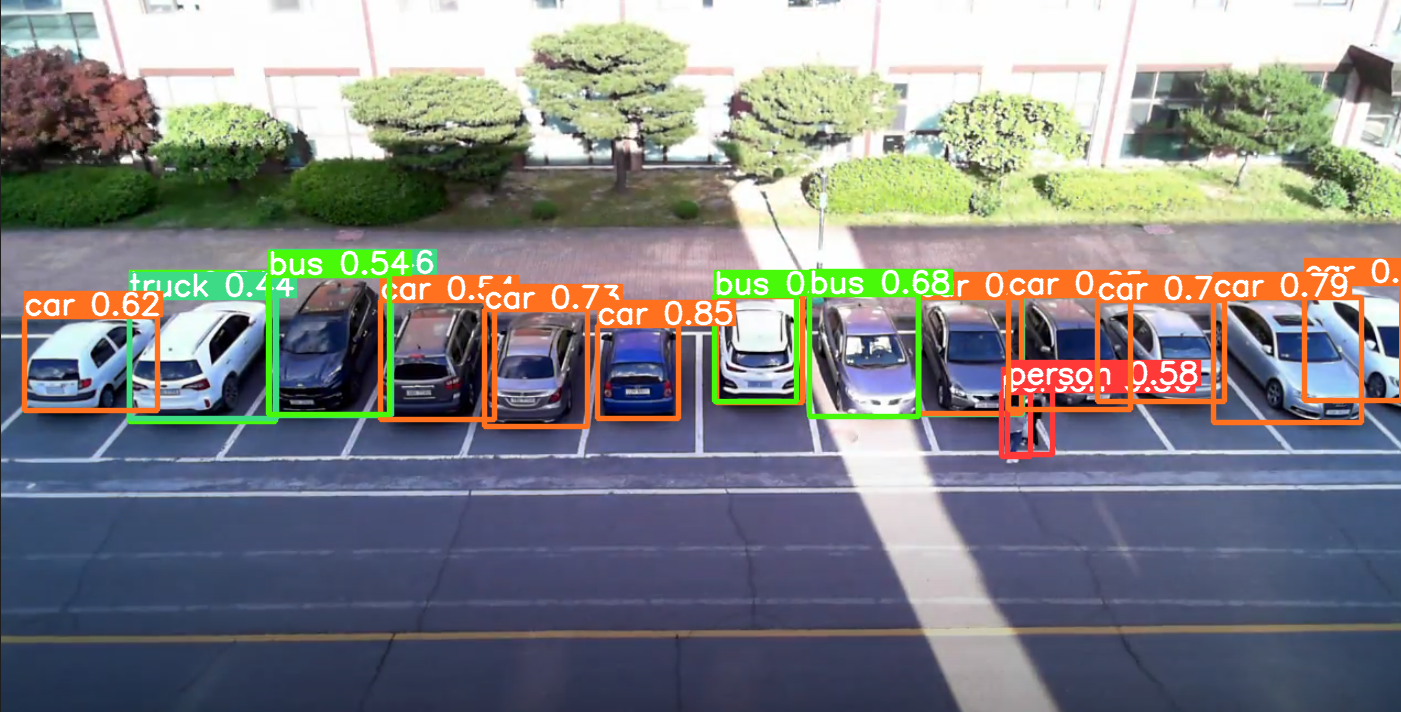

In [ ]:
%cd ~/../content/yolov5-1

import torch
import cv2
import random
from PIL import Image

# Load the Model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

# Image preparation from URL . images link
img_URL = [           
           "https://user-images.githubusercontent.com/23421059/168719874-be48ef28-954c-4a4c-a048-1e11699e0b56.png",
           ]

imgs = []
img_L = len(img_URL)

# Append these 3 images and save 
for i in range(img_L):
  imgName = f"{i}.jpg"
  torch.hub.download_url_to_file(img_URL[i],imgName)  # download 2 images
  # imgs.append(Image.open(fileName))  # PIL image
  imgs.append(cv2.imread(imgName)[:,:,::-1]) # OpenCV image (BGR to RGB)

# Run Inference
results = model(imgs)

# Print Results
results.print()

# Save Result images with bounding box drawn
results.save()  # or .show()

# Select a random test image
randNo = random.choice(range(img_L))
print(f"Selected Image No = {randNo}\n\n")

# Print the Bounding Box result:  6 columns
# Column (1~4) Coordinates of TL, BR corners (5) Confidence (6) Class ID
print(results.xyxy[randNo],'\n')  # imgs predictions (tensor)

# Print the Bounding Box result using Pandas
print(results.pandas().xyxy[randNo],'\n')  # imgs predictions (pandas)

# Show result image, For COLAB ONLY
from google.colab.patches import cv2_imshow
cv2_imshow((results.imgs[randNo])[:,:,::-1])




---


# Case 2:  Run YOLOV5 with Github Clone in CLI
## Inference with a test image

Clone YOLOv5 github  https://github.com/ultralytics/yolov5 

Then, install dependencies and check PyTorch and GPU.


In [ ]:
%cd ~/../content
!git clone https://github.com/ultralytics/yolov5  # clone
%cd ~/../content/yolov5
%pip install -qr requirements.txt  # install

# YOLOv5 modules for plot and other functions
import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 2022-5-17 Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 38.2/78.2 GB disk)


Naming the folder where YOLO saves the inference results.  Exp, Exp2, Exp3, etc..

In [ ]:
def getNo(val):
  if (val > 1):
    return f"{val}"
  else:
    return ""
  
inferenceNo = 0

`detect.py` runs YOLOv5 inference on a variety of sources, downloading models automatically from the [latest YOLOv5 release](https://github.com/ultralytics/yolov5/releases), and saving results to `runs/detect`. 

Example inference sources are:

```shell
python detect.py --source 0  # webcam
                          img.jpg  # image 
                          vid.mp4  # video
                          path/  # directory
                          path/*.jpg  # glob
                          'https://youtu.be/Zgi9g1ksQHc'  # YouTube
                          'rtsp://example.com/media.mp4'  # RTSP, RTMP, HTTP stream
```

Run YOLOv5 detect with images under the folder `data/images/`

In [ ]:
%cd ~/../content/yolov5

!python detect.py --weights yolov5s.pt --img 640 --conf 0.25 --source data/images
inferenceNo += 1

/content/yolov5
detect: weights=['yolov5s.pt'], source=data/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-196-g614ef11 Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
image 1/2 /content/yolov5/data/images/bus.jpg: 640x480 4 persons, 1 bus, Done. (0.017s)
image 2/2 /content/yolov5/data/images/zidane.jpg: 384x640 2 persons, 2 ties, Done. (0.021s)
Speed: 0.5ms pre-process, 19.3ms inference, 1.4ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp5


Display the saved inference image

runs/detect/exp5/bus.jpg


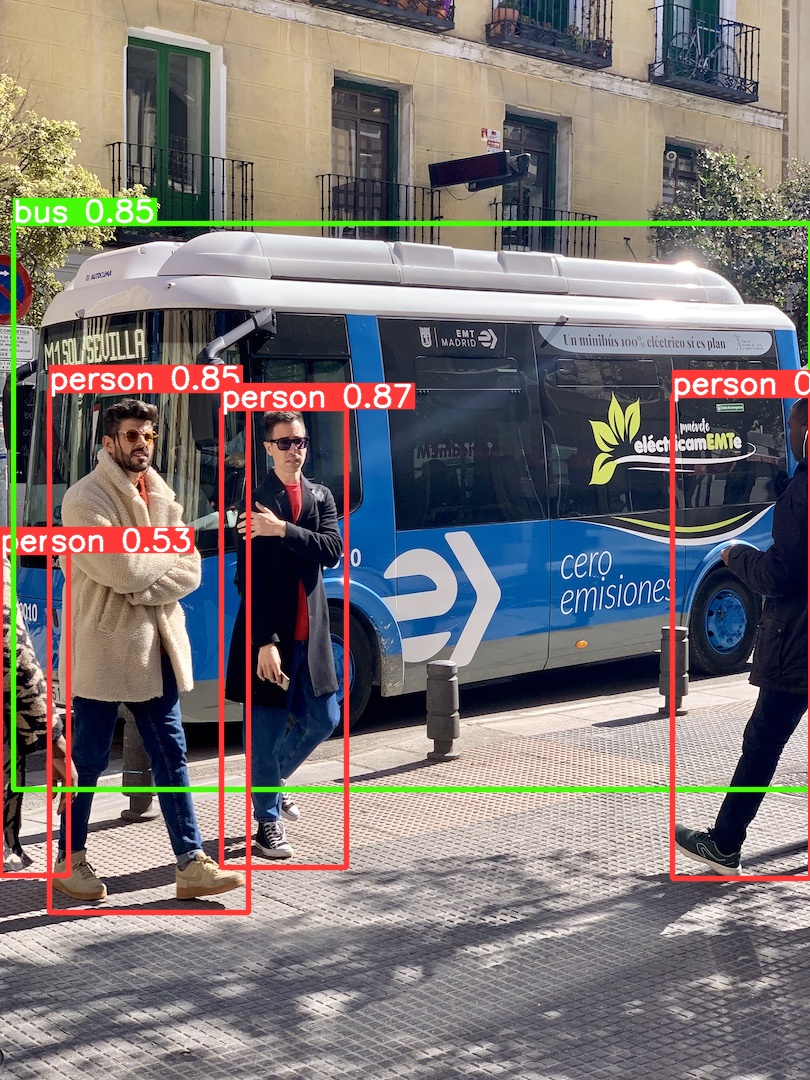

In [ ]:
# Display the saved inference image
print(f"runs/detect/exp{getNo(inferenceNo)}/bus.jpg")
display.Image(filename=f"runs/detect/exp{getNo(inferenceNo)}/bus.jpg", width=600)

## Validate pretrained model with COCO Val
Validate a model's accuracy on [COCO](https://cocodataset.org/#home) val or test-dev datasets. Models are downloaded automatically from the [latest YOLOv5 release](https://github.com/ultralytics/yolov5/releases). To show results by class use the `--verbose` flag. Note that `pycocotools` metrics may be ~1% better than the equivalent repo metrics, as is visible below, due to slight differences in mAP computation.

### COCO validation dataset



Download [COCO val 2017](https://github.com/ultralytics/yolov5/blob/74b34872fdf41941cddcf243951cdb090fbac17b/data/coco.yaml#L14) dataset (1GB - 5000 images), and test model accuracy.

In [ ]:
# Download COCO val
torch.hub.download_url_to_file('https://ultralytics.com/assets/coco2017val.zip', 'tmp.zip')
!unzip -q tmp.zip -d ../datasets && rm tmp.zip

  0%|          | 0.00/780M [00:00<?, ?B/s]

### Run YOLOv5 validation code in CLI

In [ ]:
# Run YOLOv5x on COCO val
!python val.py --weights yolov5x.pt --data coco.yaml --img 640 --iou 0.65 --half

val: data=/content/yolov5/data/coco.yaml, weights=['yolov5x.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.65, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=True, project=runs/val, name=exp, exist_ok=False, half=True, dnn=False
YOLOv5 🚀 v6.1-174-gc4cb7c6 torch 1.11.0+cu113 CUDA:0 (Tesla V100-SXM2-16GB, 16160MiB)

100% 166M/166M [00:05<00:00, 33.5MB/s]

Fusing layers... 
YOLOv5x summary: 444 layers, 86705005 parameters, 0 gradients
100% 755k/755k [00:00<00:00, 49.6MB/s]
val: Scanning '/content/datasets/coco/val2017' images and labels...4952 found, 48 missing, 0 empty, 0 corrupt: 100% 5000/5000 [00:00<00:00, 10667.19it/s]
val: New cache created: /content/datasets/coco/val2017.cache
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100% 157/157 [00:58<00:00,  2.70it/s]
                 all       5000      36335      0.743      0.626      0.683 

## Test YOLOv5 with COCO test dataset
Download [COCO test2017](https://github.com/ultralytics/yolov5/blob/74b34872fdf41941cddcf243951cdb090fbac17b/data/coco.yaml#L15) dataset (7GB - 40,000 images), to test model accuracy on test-dev set (**20,000 images, no labels**). Results are saved to a `*.json` file which should be **zipped** and submitted to the evaluation server at https://competitions.codalab.org/competitions/20794.

In [ ]:
# Download COCO test-dev2017
torch.hub.download_url_to_file('https://ultralytics.com/assets/coco2017labels.zip', 'tmp.zip')
!unzip -q tmp.zip -d ../datasets && rm tmp.zip
!f="test2017.zip" && curl http://images.cocodataset.org/zips/$f -o $f && unzip -q $f -d ../datasets/coco/images

In [ ]:
# Run YOLOv5x on COCO test
!python val.py --weights yolov5x.pt --data coco.yaml --img 640 --iou 0.65 --half --task test

# Appendix

Optional extras below. Unit tests validate repo functionality and should be run on any PRs submitted.


In [ ]:
# Reproduce
for x in 'yolov5n', 'yolov5s', 'yolov5m', 'yolov5l', 'yolov5x':
  !python val.py --weights {x}.pt --data coco.yaml --img 640 --task speed  # speed
  !python val.py --weights {x}.pt --data coco.yaml --img 640 --conf 0.001 --iou 0.65  # mAP

In [ ]:
# PyTorch Hub
import torch

# Model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

# Images
dir = 'https://ultralytics.com/images/'
imgs = [dir + f for f in ('zidane.jpg', 'bus.jpg')]  # batch of images

# Inference
results = model(imgs)
results.print()  # or .show(), .save()